<a href="https://colab.research.google.com/github/VVB-Github/Add-cliking-prediction/blob/main/Salaries_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

In [ ]:
pwd

'/content'

In [ ]:
ls

sample_data/


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_id: 1n6jYcm-r4W3WNsPBK25iG3GlVj-l7sjv

SyntaxError: ignored

In [ ]:
url='https://drive.google.com/uc?id={}'.format("1n6jYcm-r4W3WNsPBK25iG3GlVj-l7sjv")

In [ ]:
df=pd.read_csv(url)

In [ ]:
df.head(3)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0


In [ ]:
df["Job Title"].nunique()

193

In [ ]:
df["Education Level"].nunique()

7

In [ ]:
gender=pd.get_dummies(df,columns=["Gender"],drop_first=True)

In [ ]:
df=gender

In [ ]:
df=pd.get_dummies(df,columns=['Education Level'],drop_first=True)

In [ ]:
df.keys()

Index(['Age', 'Job Title', 'Years of Experience', 'Salary', 'Gender_Male',
       'Gender_Other', 'Education Level_Bachelor's Degree',
       'Education Level_High School', 'Education Level_Master's',
       'Education Level_Master's Degree', 'Education Level_PhD',
       'Education Level_phD'],
      dtype='object')

In [ ]:
df.head()

,Age,Job Title,Years of Experience,Salary,Gender_Male,Gender_Other,Education Level_Bachelor's Degree,Education Level_High School,Education Level_Master's,Education Level_Master's Degree,Education Level_PhD,Education Level_phD
0,32.0,Software Engineer,5.0,90000.0,1,0,0,0,0,0,0,0
1,28.0,Data Analyst,3.0,65000.0,0,0,0,0,1,0,0,0
2,45.0,Senior Manager,15.0,150000.0,1,0,0,0,0,0,1,0
3,36.0,Sales Associate,7.0,60000.0,0,0,0,0,0,0,0,0
4,52.0,Director,20.0,200000.0,1,0,0,0,1,0,0,0


<Axes: xlabel='Salary', ylabel='Count'>

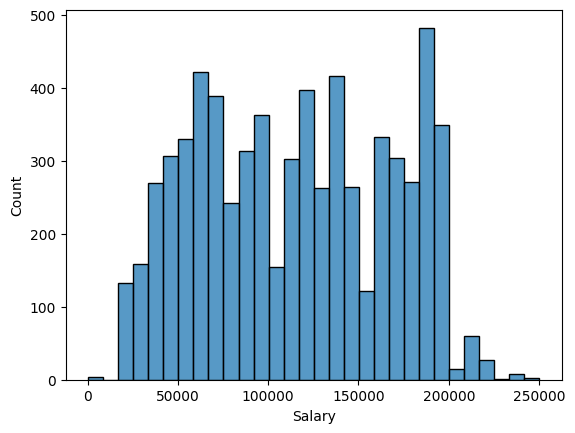

In [ ]:
sns.histplot(data=df,x=df['Salary'],bins=30)

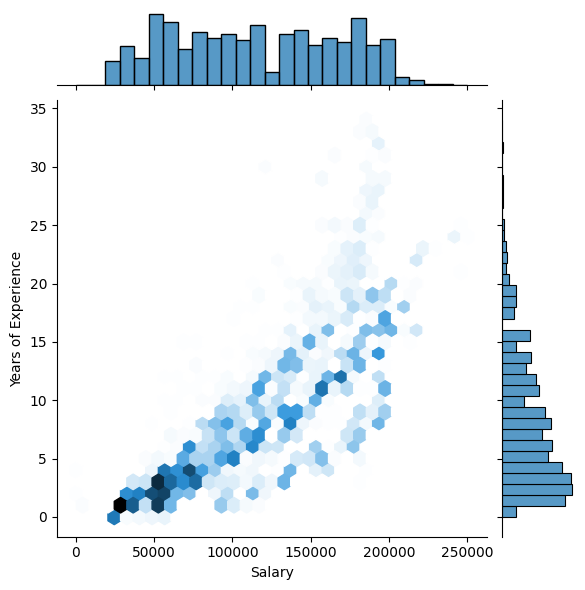

In [ ]:
sns.jointplot(x=df['Salary'],y=df['Years of Experience'],kind="hex")

In [ ]:
df.keys()

Index(['Age', 'Job Title', 'Years of Experience', 'Salary', 'Gender_Male',
       'Gender_Other', 'Education Level_Bachelor's Degree',
       'Education Level_High School', 'Education Level_Master's',
       'Education Level_Master's Degree', 'Education Level_PhD',
       'Education Level_phD'],
      dtype='object')

In [ ]:
pd.isnull(df).sum()

Age                                  2
Job Title                            2
Years of Experience                  3
Salary                               5
Gender_Male                          0
Gender_Other                         0
Education Level_Bachelor's Degree    0
Education Level_High School          0
Education Level_Master's             0
Education Level_Master's Degree      0
Education Level_PhD                  0
Education Level_phD                  0
dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
pd.isnull(df).sum()

Age                                  0
Job Title                            0
Years of Experience                  0
Salary                               0
Gender_Male                          0
Gender_Other                         0
Education Level_Bachelor's Degree    0
Education Level_High School          0
Education Level_Master's             0
Education Level_Master's Degree      0
Education Level_PhD                  0
Education Level_phD                  0
dtype: int64

In [ ]:
X=df[['Age', 'Years of Experience','Gender_Male',
       'Gender_Other', "Education Level_Bachelor's Degree",
       'Education Level_High School', "Education Level_Master's",
       "Education Level_Master's Degree", 'Education Level_PhD',
       'Education Level_phD']]

In [ ]:
y=df['Salary']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
pred=model.predict(X_test)

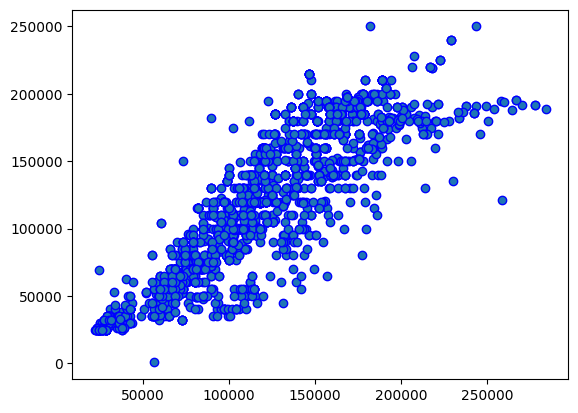

In [ ]:
fig,ax=plt.subplots()
ax.scatter(pred,y_test,edgecolors=(0,0,1))

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test,pred)

0.7710062104867994

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
rmsde=np.sqrt(mean_squared_error(y_test,pred))

In [ ]:
mean_sal=df['Salary'].mean()

In [ ]:
(rmsde/mean_sal)*100

22.06077981428192

Not a best r2 and rmsde

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
df['Job Title'] = le.fit_transform(df['Job Title'])

In [ ]:
df

,Age,Job Title,Years of Experience,Salary,Gender_Male,Gender_Other,Education Level_Bachelor's Degree,Education Level_High School,Education Level_Master's,Education Level_Master's Degree,Education Level_PhD,Education Level_phD
0,32.0,176,5.0,90000.0,1,0,0,0,0,0,0,0
1,28.0,18,3.0,65000.0,0,0,0,0,1,0,0,0
2,45.0,145,15.0,150000.0,1,0,0,0,0,0,1,0
3,36.0,116,7.0,60000.0,0,0,0,0,0,0,0,0
4,52.0,26,20.0,200000.0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6699,49.0,34,20.0,200000.0,0,0,0,0,0,0,1,0
6700,32.0,116,3.0,50000.0,1,0,0,1,0,0,0,0
6701,30.0,42,4.0,55000.0,0,0,1,0,0,0,0,0
6702,46.0,97,14.0,140000.0,1,0,0,0,0,1,0,0


In [ ]:
from sklearn.tree import DecisionTreeRegressor
model2=DecisionTreeRegressor(random_state=2)

In [ ]:
model2.fit(X_train,y_train)

DecisionTreeRegressor(random_state=2)

In [ ]:
pred2=model2.predict(X_test)

In [ ]:
print(r2_score(y_test,pred2))

0.9380015998239342


In [ ]:
rmse=np.sqrt(mean_squared_error(y_test,pred2))

In [ ]:
mean=pred2.mean()

In [ ]:
rmse/mean

0.11347228024514834

Let's applay random forest tree

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model3=RandomForestRegressor(n_estimators=100)

In [ ]:
model3.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
pred3=model3.predict(X_test)

In [ ]:
print(r2_score(y_test,pred3))
rmse=np.sqrt(mean_squared_error(y_test,pred3))
mean=pred3.mean()
rmse/mean

0.9453673774305147


0.10632922247160463